In [145]:
import scipy
import numpy as np
from tools import *
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


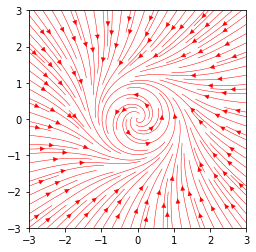

In [146]:
def dF(r, theta):
    return 0.5*r*(1 - r*r), 1+0*theta

X, Y = np.meshgrid(np.linspace(-3.0, 3.0, 30), np.linspace(-3.0, 3.0, 30))
R, Theta = (X**2 + Y**2)**0.5, np.arctan2(Y, X)
dR, dTheta = dF(R, Theta)
C, S = np.cos(Theta), np.sin(Theta)
U, V = dR*C - R*S*dTheta, dR*S+R*C*dTheta

plt.streamplot(X, Y, U, V, color='r', linewidth=0.5, density=1.6)
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.show()

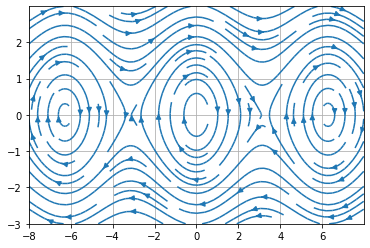

In [147]:
g,L = 1,1
xvalues, yvalues = np.meshgrid(np.arange(-8, 8, 0.01), np.arange(-3, 3, 0.01))
xdot = yvalues
ydot = -g/L*np.sin(xvalues)
plt.streamplot(xvalues, yvalues, xdot, ydot)
plt.grid(); plt.show()

(800, 800) (800, 800)


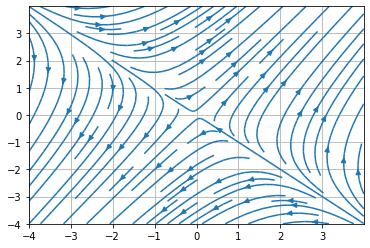

In [148]:
g,L = 1,1
X, Y = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
A = np.array([[1,2],[3,2]])
print(X.shape, Y.shape)
A = np.array([[1,2],[3,2]])
U = X + 2*Y
V = 3*X + 2*Y
# xdot = yvalues
# ydot = -g/L*np.sin(xvalues)
plt.streamplot(X, Y, U, V)
plt.grid(); plt.show()

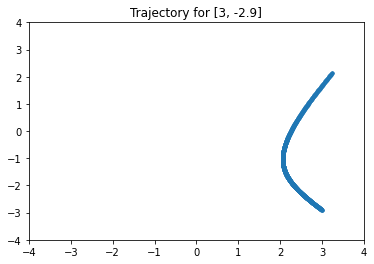

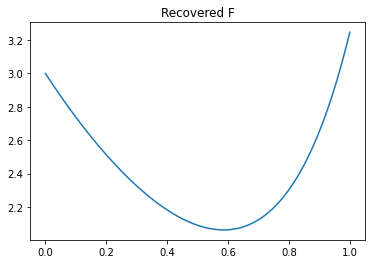

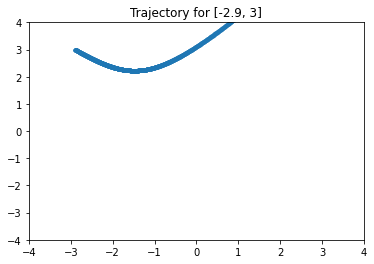

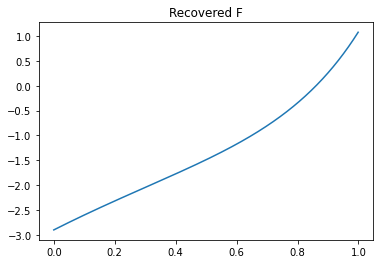

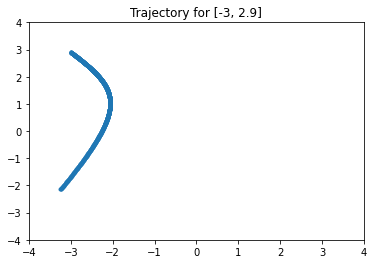

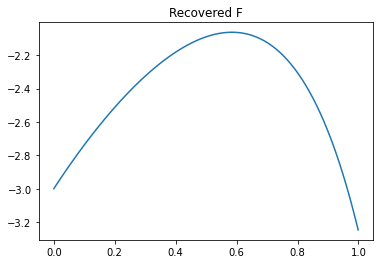

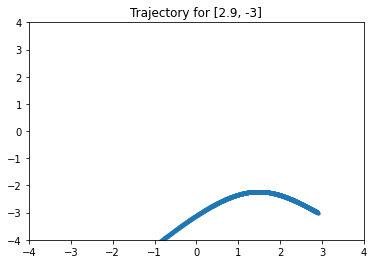

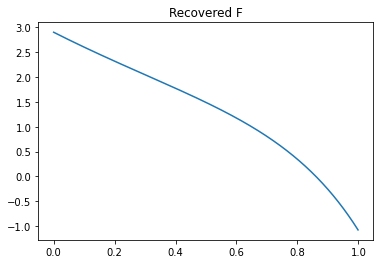

In [149]:

import scipy.interpolate

X0s = [[3,-2.9], [-2.9,3], [-3,2.9], [2.9,-3]]
dt = 0.001
T = 1
x = np.arange(0,T,dt)
n = len(x)

for x0 in X0s:
    xo = np.array(x0)
    Xn = np.zeros((n,2))
    Xn[0] = x0
    for i in range(1,n):
        Xn[i] = Xn[i-1] + ((A @ Xn[i-1])*dt)

    plt.plot(Xn[:,0],Xn[:,1], '.-')
    plt.xlim([-4,4]); plt.ylim([-4,4])
    plt.title(f'Trajectory for {x0}')
    plt.show()

    f = scipy.interpolate.CubicHermiteSpline(x,Xn[:,0],Xn[:,1])
    plt.title(f'Recovered F')
    plt.plot(x,f(x))
    plt.show()

In [150]:
def epx(lams):
    def f(t, cs):
        sol = np.zeros_like(t,dtype=type(lams[0]))
        for i in range(len(lams)):
            sol += cs[i]*np.exp(t*lams[i])
        return sol.real
    return f

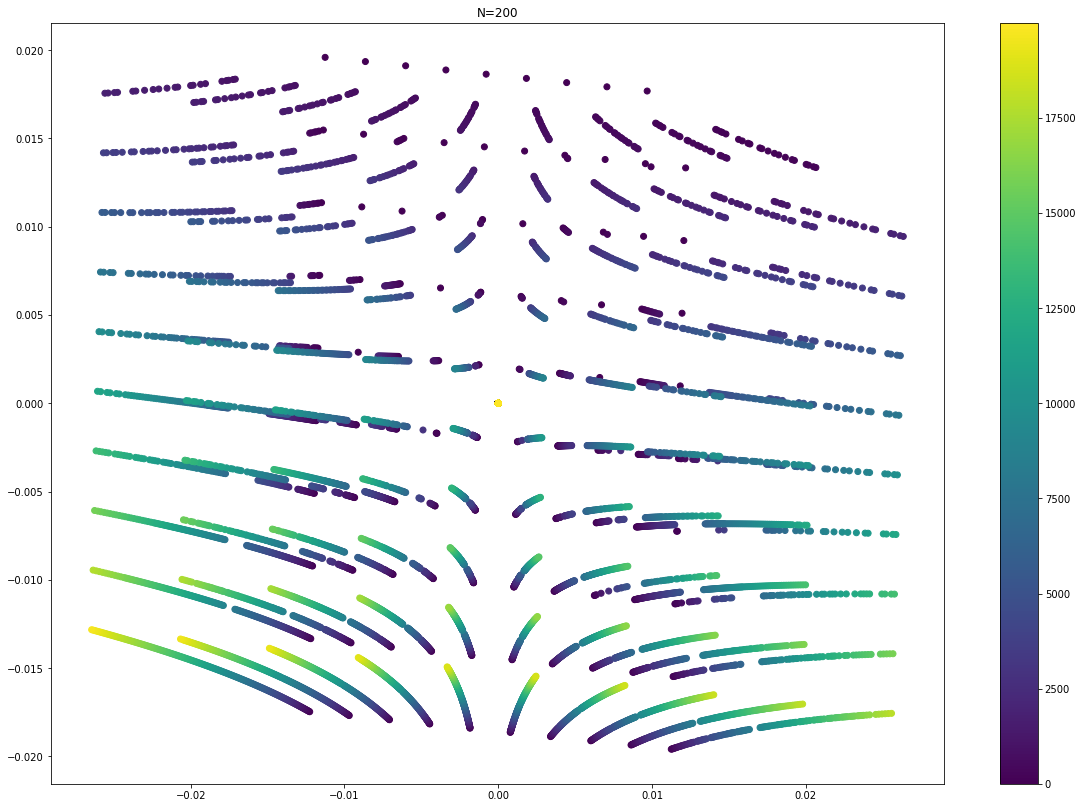

In [151]:
lams = [complex(3j*1.732), complex(-3j*1.732)] # circle
lams = [complex(2+8j), complex(2-8j)] # spiral
lams = [-1.0,4.0] # hyperbolic
f = epx(lams)


dt = 0.001
T = 1
x = np.arange(0,T,dt)

num_cs = 10
X_ts = []
for c1 in np.linspace(-2,2,num_cs):
    for c2 in np.linspace(-2,2,num_cs):
        cs = [c1,c2]
        x_t = f(x,cs)
        X_ts.append(x_t)

center = False
dim = 200
L = len(x) - dim
H = multi_build_hankel(X_ts, dim)
plot_embed(H, [dim], center=center, hankel=True, square_plot=False)


In [152]:
x.shape

(1000,)

In [153]:
if center: 
    H -= H[H.shape[0]//2]
u, s, v = np.linalg.svd(H, full_matrices=False)

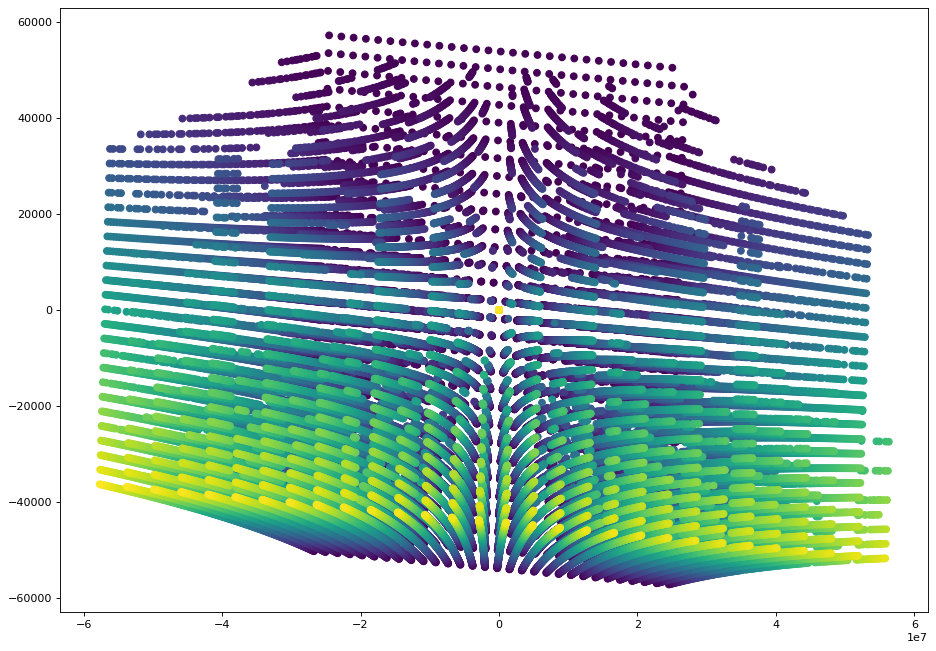

In [154]:

figure(figsize=(14, 10), dpi=80)
dt = 0.001
# x_new = np.arange(0,1,dt)
x_new = np.linspace(0,1,len(x))
num_cs = 30
X_ts = []
for c1 in np.linspace(-2,2,num_cs):
    for c2 in np.linspace(-2,2,num_cs):
        cs = [c1, c2]
        x_t = f(x_new, cs)
        X_ts.append(x_t)


H_new = multi_build_hankel(X_ts, dim)
if center:
    H_new -= H_new[H_new.shape[0]//2]

recon = (u  @ np.diag(s)).T @ H_new
plt.scatter(recon[0], recon[1],c=np.linspace(0,1,recon.shape[1]))
plt.show()

(2, 800) (800, 180000)


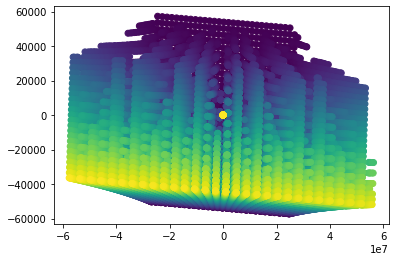

In [160]:
print( ((u  @ np.diag(s)).T)[:2].shape , H_new.shape)

recon = (u  @ np.diag(s)).T[:2] @ H_new
plt.scatter(recon[0], recon[1],c=np.linspace(0,1,recon.shape[1]))
plt.show()

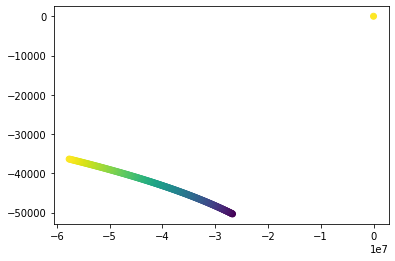

In [156]:
single_traj = recon[:, ::899]
plt.scatter(single_traj[0], single_traj[1], c=np.linspace(0,1,len(single_traj[0])))
plt.show()